In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from molfeat.trans.fp import FPVecTransformer

In [46]:
qm9_data = pd.read_parquet("../../data/qm9_dataset.parquet")

In [47]:
qm9_data

,smiles,gap
0,C,0.5048
1,N,0.3399
2,O,0.3615
3,C#C,0.3351
4,C#N,0.3796
...,...,...
133880,C1C2C3C4C5OC14C5N23,0.2842
133881,C1N2C3C2C2C4OC12C34,0.3002
133882,C1N2C3C4C5C2C13CN45,0.2953
133883,C1N2C3C4C5CC13C2C45,0.3003


<function matplotlib.pyplot.show(close=None, block=None)>

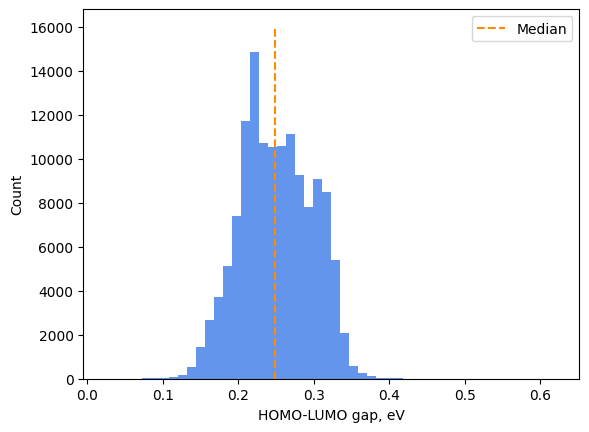

In [48]:
fig = plt.figure()
plt.hist(qm9_data["gap"], bins=50, color="cornflowerblue")
plt.vlines(x=qm9_data["gap"].median(), ymin=0, ymax=16000, color="darkorange", linestyle="--", label="Median")
plt.xlabel("HOMO-LUMO gap, eV")
plt.ylabel("Count")
plt.legend()
plt.show

In [49]:
qm9_data["gap_binary"] = (qm9_data["gap"] > qm9_data["gap"].median()).astype(int)

In [50]:
qm9_data

,smiles,gap,gap_binary
0,C,0.5048,1
1,N,0.3399,1
2,O,0.3615,1
3,C#C,0.3351,1
4,C#N,0.3796,1
...,...,...,...
133880,C1C2C3C4C5OC14C5N23,0.2842,1
133881,C1N2C3C2C2C4OC12C34,0.3002,1
133882,C1N2C3C4C5C2C13CN45,0.2953,1
133883,C1N2C3C4C5CC13C2C45,0.3003,1


# Featurize with ECFP 

In [51]:
transformer = FPVecTransformer(kind='ecfp', dtype=float)

In [52]:
features = transformer(qm9_data["smiles"])


/Users/ineporozhnii/miniconda3/envs/isd_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [53]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(133885, 2000))

In [54]:
qm9_data["ecfp4"] = list(features)

In [55]:
qm9_data

,smiles,gap,gap_binary,ecfp4
0,C,0.5048,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,N,0.3399,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,O,0.3615,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,C#C,0.3351,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,C#N,0.3796,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
133880,C1C2C3C4C5OC14C5N23,0.2842,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
133881,C1N2C3C2C2C4OC12C34,0.3002,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
133882,C1N2C3C4C5C2C13CN45,0.2953,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
133883,C1N2C3C4C5CC13C2C45,0.3003,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Split processed data into inferece set (explorable), validation set, and test set 

In [56]:
qm9_data_explorable = qm9_data.sample(frac=0.8, random_state=42)
qm9_data_explorable

,smiles,gap,gap_binary,ecfp4
3115,N#CC12CC1CO2,0.2541,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
117879,COCC(O)C#CC=O,0.2040,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
23433,COC1C2CC(=NO)C12,0.2414,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61955,CC(CC=O)OCC#C,0.2239,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98811,COC(=N)N1CCC1=N,0.2400,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
87393,CC1CC11C(C)OC1C,0.3167,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61282,CC(CC#N)NC(C)=O,0.2760,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
33921,C#CC12CCC=CC1N2,0.2243,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
21944,OCCC1=CN=NO1,0.2342,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [57]:
qm9_data_valid = qm9_data.drop(index=qm9_data_explorable.index).sample(frac=0.5)
qm9_data_valid

,smiles,gap,gap_binary,ecfp4
96728,CN=C(NC=O)C1CC1,0.2221,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
65623,CC1(OC2COC12)C#N,0.2774,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
29318,CC1=CNC(C#N)=C1O,0.2033,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20808,CCC1=CC(C)=NO1,0.2476,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
51801,O=CNC1CCC2OC12,0.2790,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
79012,CC1C2C3C4CC2C1N34,0.3293,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
59021,CC(O)C1=CCC(O)C1,0.2597,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
54391,NC(=O)C12CC(N1)C2=O,0.2371,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
27725,OC1=NC(O)=C(N1)C#N,0.2061,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [58]:
qm9_data_test = qm9_data.drop(index=qm9_data_explorable.index.union(qm9_data_valid.index))

### Sanity Check

In [59]:
qm9_data_explorable.merge(qm9_data_test, on="smiles", how="inner")

,smiles,gap_x,gap_binary_x,ecfp4_x,gap_y,gap_binary_y,ecfp4_y


In [60]:
qm9_data_explorable.merge(qm9_data_valid, on="smiles", how="inner")

,smiles,gap_x,gap_binary_x,ecfp4_x,gap_y,gap_binary_y,ecfp4_y


### Save processed QM9 data

In [61]:
qm9_save_dir = "../../data/QM9"
os.makedirs(qm9_save_dir, exist_ok=True)

qm9_data_explorable.to_parquet(f"{qm9_save_dir}/explorable.parquet")
qm9_data_valid.to_parquet(f"{qm9_save_dir}/valid.parquet")
qm9_data_test.to_parquet(f"{qm9_save_dir}/test.parquet")